<a href="https://colab.research.google.com/github/elhamod/BA865-2024/blob/main/hands-on/Diabetes_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is adopted from https://colab.research.google.com/github/mlittmancs/great_courses_ml/blob/master/L09aux.ipynb

This notebook classifies diabetes using a decision tree.  We will see how the number of leaves and size of training data affect the performance of the model.

Below we import our libraries.

In [1]:
import random
from sklearn import tree
import matplotlib.pyplot as plt
import math
import pandas as pd

Next, we download the data from GitHub.
We display the data

In [2]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

df = pd.read_csv("diabetes.csv")
df

--2024-03-20 01:34:04--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2024-03-20 01:34:04 (11.9 MB/s) - ‘diabetes.csv’ saved [23873/23873]



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Split the data into training and testing

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Next we will train 28 decision trees with 2 to 20 `max_leaf_nodes` and record the train and test error.

In [4]:
from sklearn.metrics import accuracy_score

df_results = pd.DataFrame(columns=["n_leaves", "train error", "test error"])
nleaves = range(2,40)
# depths = range(2,12)

for n in nleaves: #depths
  clf = tree.DecisionTreeClassifier(max_leaf_nodes = n)
  # clf = tree.DecisionTreeClassifier(max_depth = n)
  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred)
  trainerr = 1 - accuracy_train

  y_pred = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred)
  testerr = 1 - accuracy_test

  df_results = df_results.append({"n_leaves": n, "train error": trainerr, "test error": testerr}, ignore_index = True)

<ipython-input-4-37d3d011862e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({"n_leaves": n, "train error": trainerr, "test error": testerr}, ignore_index = True)
<ipython-input-4-37d3d011862e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({"n_leaves": n, "train error": trainerr, "test error": testerr}, ignore_index = True)
<ipython-input-4-37d3d011862e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({"n_leaves": n, "train error": trainerr, "test error": testerr}, ignore_index = True)
<ipython-input-4-37d3d011862e>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

In [5]:
df_results

,n_leaves,train error,test error
0,2.0,0.265472,0.259740
1,3.0,0.228013,0.227273
2,4.0,0.228013,0.227273
3,5.0,0.228013,0.227273
4,6.0,0.221498,0.292208
5,7.0,0.221498,0.292208
6,8.0,0.216612,0.305195
7,9.0,0.198697,0.233766
8,10.0,0.190554,0.272727
9,11.0,0.175896,0.266234


We plot the train and test error by number of leaves below.

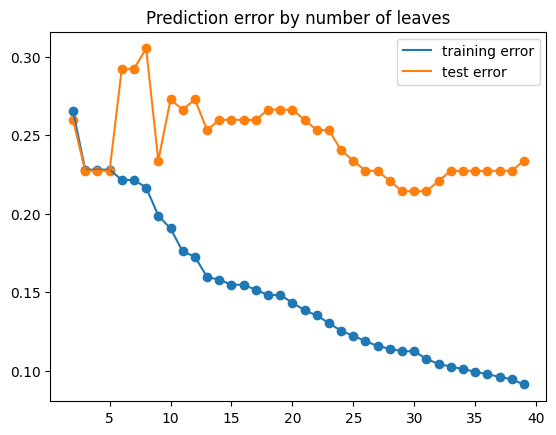

In [6]:
import plotly.express as px

plt.scatter(df_results["n_leaves"], df_results["train error"])
plt.plot(df_results["n_leaves"], df_results["train error"], label='training error')
plt.scatter(df_results["n_leaves"], df_results["test error"])
plt.plot(df_results["n_leaves"], df_results["test error"], label='test error')
plt.legend()
plt.title('Prediction error by number of leaves')
plt.show()

Now we will see how the performance of the model is affected by the size of the training data.  We will:

In [ ]:
import numpy as np



In [ ]:
df_results

Finally, we plot the error rate of the training data and the test data in relation to the size of the training data.

In [ ]:
plt.scatter(df_results["size"], df_results["average train error"])
plt.plot(df_results["size"], df_results["average train error"], label='training error')
plt.scatter(df_results["size"], df_results["average test error"])
plt.plot(df_results["size"], df_results["average test error"], label='test error')
plt.legend()
plt.title('Prediction error by size of training data')
plt.show()

Now, let's add some features with random values and see how they affect the model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz






In [ ]:
dot_data = tree.export_graphviz(clf, feature_names=,
                      filled=True, rounded=True, proportion=True)
graph = graphviz.Source(dot_data)
graph